In [1]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv,rgba2rgb
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import numpy as np
from skimage import data
from skimage.morphology import disk
from skimage.filters import median

from skimage.exposure import histogram
from matplotlib.pyplot import bar


In [2]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

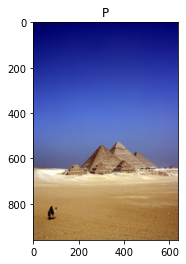

In [3]:
# Ex: imread and imshow 
pyramids = [io.imread('pyramids.jpeg')]
show_images(pyramids, 'PYRAMIDS')

In [4]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

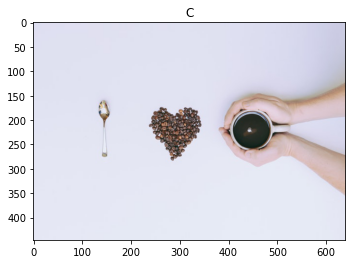

(446, 640, 3)


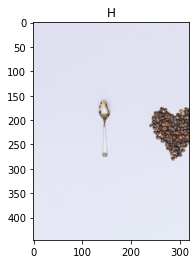

(446, 320, 3)


In [5]:
'''
@TODO:
Requirement #1 
-Read and print image 'coffee'  
-Show and print half of the  image
-----hint :use the attribute shape of numpy to get the image object dimentions
'''
# imread ==> return multi dimension numpy array
coffee = [io.imread('coffee.jpeg')]
show_images(coffee , 'COFFEE')
print(coffee[0].shape)

#no need to convert to integer as the width & height are even
width = int (coffee[0].shape[1]/2)
height = int(coffee[0].shape[0] )

half = [coffee[0][0:height,:width]]
show_images(half , 'HALF_COFFEE')

print(half[0].shape)

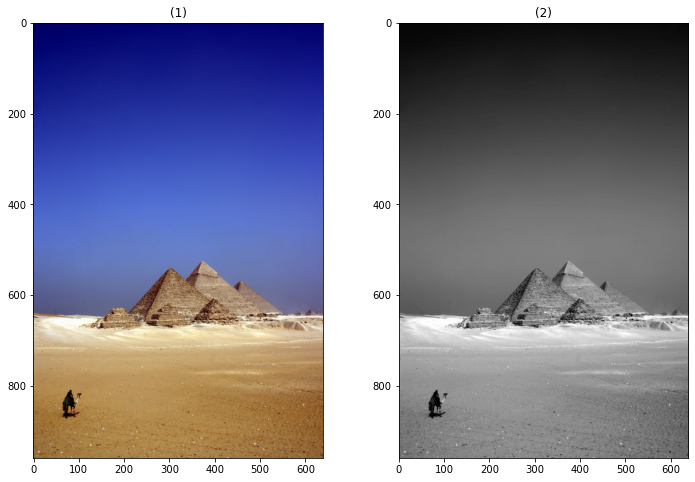

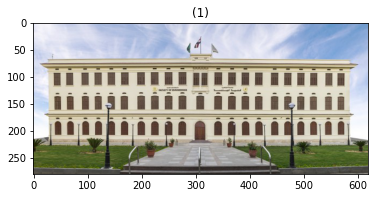

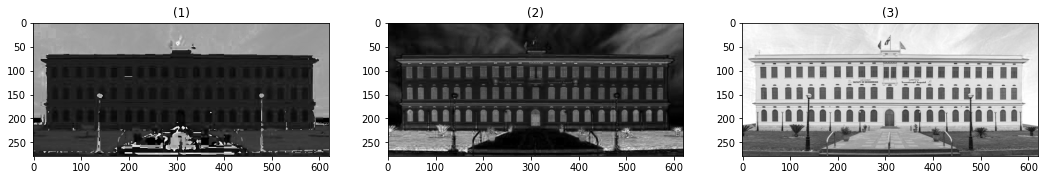

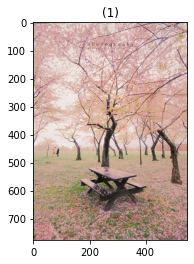

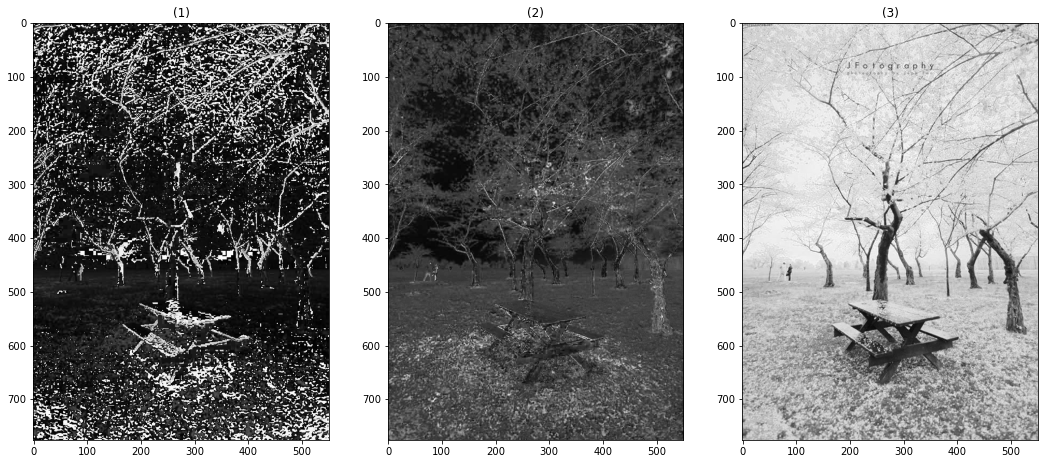

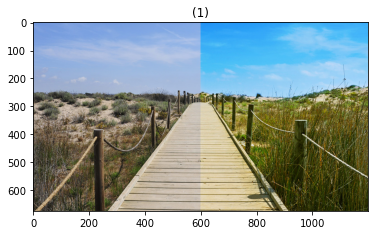

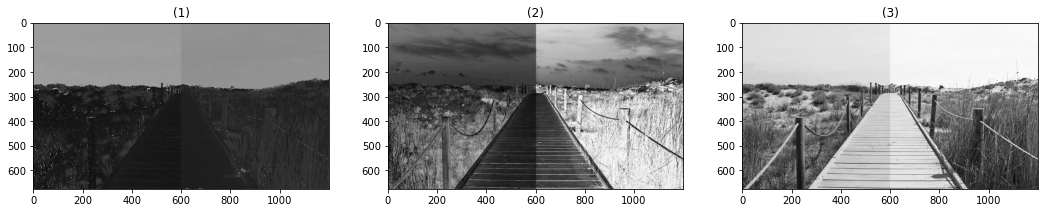

In [17]:
'''
@TODO:
Requirement #2 
RGB to gray and HSV:
1- Write a function 'gray_image' that takes an image as input , then
    -get the gray scale of the image, then
    -display original image and the gray scale one side by side (subplot).
    -hint: use rgb2gray to get the graylevel of the image
- test your function with the image 'pyramids'
    
2- Write a function 'HSV_image' that takes an image as input , then
   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).
   -hint: -use rgb2hsv (to get the hsv representation of the image).
          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], 
           where hsvImg is the hsv representation of the image. 
           Hue is the first channel, Saturation is the second and value is the last channel.
- test your function for the images in HSV Folder. And comment on the results. 
'''
# converted to gray scale
def gray_image(image):
    gray_scale_coffe = rgb2gray(image)
    images = [image ,gray_scale_coffe ]
    show_images(images)

    
pyr = io.imread('pyramids.jpeg')
pyramids = gray_image(pyr)

########################################################################
  
def HSV_image (img):
    imgs = [img]
    show_images(imgs)
    hsv_img = rgb2hsv(img)
    hsv_channels = [hsv_img[:,:,0],hsv_img[:,:,1], hsv_img[:,:,2]]
    #print(hsv_img[:,:,0])
    #print(hsv_img[:,:,1])
    #print(hsv_img[:,:,2])
    show_images(hsv_channels)

#comments on result ==> value is like a brightness for human & saturation is how the color is pure.     
imag1 = io.imread('ex11.png')
imag11 = HSV_image(imag1)

imag2 = io.imread('ex22.jpg')
imag22 = HSV_image(imag2)

imag3 = io.imread('ex33.jpg')
imag33 = HSV_image(imag3)



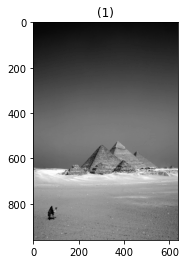

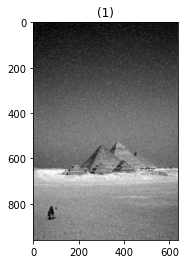

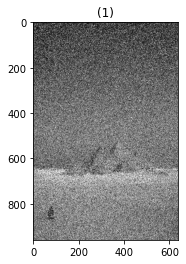

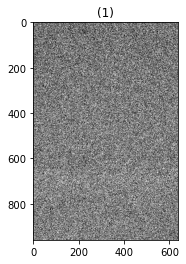

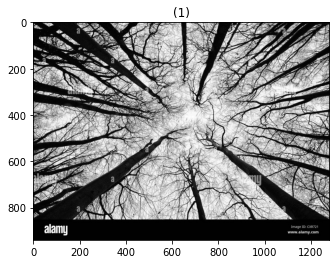

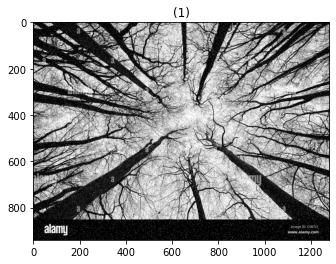

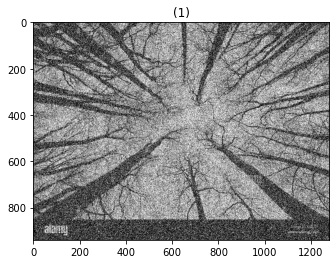

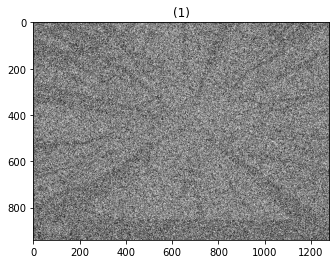

In [7]:
'''
Requirement 2 (Noise):
http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise

1.For an image of your choice (the effect of noise must be obvious): 
    Read the image.
    Convert it to greyscale.
    Apply salt & pepper noise with 
    amount=0.05, 0.5 and 0.9
   
2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    
'''
#first
imagWithNoisee = io.imread('pyramids.jpeg')
#imagWithNoise1 =rgba2rgb(imagWithNoise)
imagWithNoise2e =[rgb2gray(imagWithNoisee)]
show_images(imagWithNoise2e)

noise_img1e = [random_noise(imagWithNoise2e[0], mode='s&p',amount=0.05)]
noise_img2e = [random_noise(imagWithNoise2e[0], mode='s&p',amount=0.5)]
noise_img3e = [random_noise(imagWithNoise2e[0], mode='s&p',amount=0.9)]

show_images(noise_img1e)
show_images(noise_img2e)

show_images(noise_img3e)

#second req

imagWithNoise = io.imread('tr.jpeg')
#imagWithNoise1 =rgba2rgb(imagWithNoise)
imagWithNoise2 =[rgb2gray(imagWithNoise)]
show_images(imagWithNoise2)

noise_img1 = [random_noise(imagWithNoise2[0], mode='s&p',amount=0.05)]
noise_img2 = [random_noise(imagWithNoise2[0], mode='s&p',amount=0.5)]
noise_img3 = [random_noise(imagWithNoise2[0], mode='s&p',amount=0.9)]

show_images(noise_img1)
show_images(noise_img2)

show_images(noise_img3)

#print (imagWithNoise2[0])
#print (noise_img3[0])
#2. QUESTION-----From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    
# low pass filter used for noise reduction so ==> noise is a high frequency
# noise ==> pick a pixel randomly and make its value 0 or 1 so in the binary images the probability to noise a pixel is 50%
# and in gray scale the probability is about 1/256
# in the gray sacle if the values close to 0 or 1 ==> the image will still be obivous

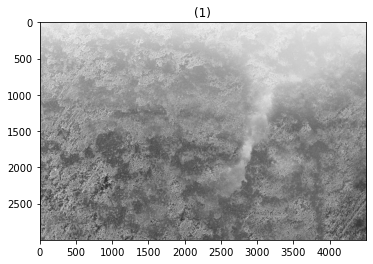

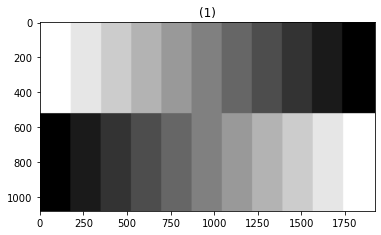

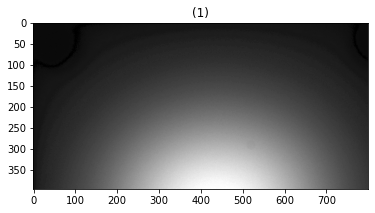

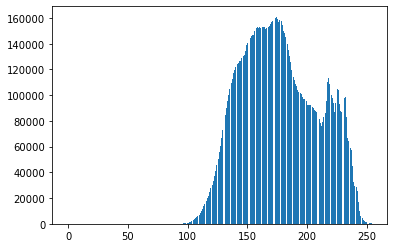

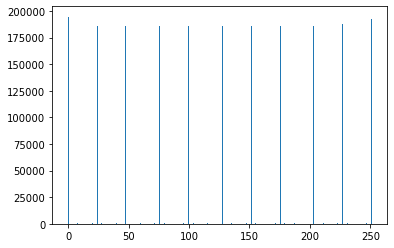

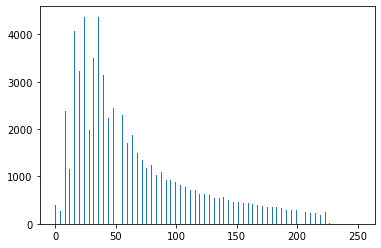

In [27]:
'''
Requirement 3 (Histogram):

1- For the given images ( in histogram folder): 
    Read the image.
    Apply histogram and show it.
Hint
    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?
    B) and function(showHist) to draw it.
** 2- Draw a grey-scale image that has uniform histogram 
same number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.
use np.ones to draw image with ones.
'''
imagWithHisto1 = io.imread('ex1.jpg')
imagWithHisto2 = rgba2rgb(io.imread('ex2.png'))
imagWithHisto3 = io.imread('ex3.png')

imagWithHisto_grayScale1 = [rgb2gray(imagWithHisto1)]
imagWithHisto_grayScale2 = [rgb2gray(imagWithHisto2)]
imagWithHisto_grayScale3 = [rgb2gray(imagWithHisto3)]

show_images(imagWithHisto_grayScale1)
show_images(imagWithHisto_grayScale2)
show_images(imagWithHisto_grayScale3)

#plt.plot(bin_edges[0:-1], histogram)  
#img1_resized = resize(imagWithHisto_grayScale1[0], (256, 256))
histogram1, bin_edges1 = np.histogram(imagWithHisto_grayScale1[0], bins=256, range=(0, 1))
#print(histogram1)
#print(bin_edges1)
bin_edges11 = bin_edges1[0:256]
hist1 = [histogram1,bin_edges11]
showHist(None ,hist1 )

#img2_resized = resize(imagWithHisto_grayScale2[0], (256, 256))
histogram2, bin_edges2 = np.histogram(imagWithHisto_grayScale2[0], bins=64, range=(0, 1))
bin_edges22 = bin_edges2[0:64]
hist2 = [histogram2,bin_edges22]
showHist(None ,hist2 )


img3_resized = resize(imagWithHisto_grayScale3[0], (256, 256))
histogram3, bin_edges3 = np.histogram(img3_resized, bins=64, range=(0, 1))
bin_edges33 = bin_edges3[0:64]
hist3 = [histogram3,bin_edges33]
showHist(None ,hist3 )

#different values for nbins (256,64,8), What does it mean?
# the number of bins refer to the number of points in the x-axis and affects on the shape of the distribution
# for example if bins = 256 ==> the number of points in the x-axis is 256 and must opposite to 256 points in the y axis
#note: the function np.histogram(img3_resized, bins=64, range=(0, 1)) ==> return number of bins = number of histograms + 1 

[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  ...
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]]

 [[0.00784314 0.00784314 0.00784314]
  [0.00784314 0.00784314 0.00784314]
  [0.00784314 0.00784314 0.00784314]
  ...
  [0.00784314 0.00784314 0.00784314]
  [0.00784314 0.00784314 0.00784314]
  [0.00784314 0.00784314 0.00784314]]

 ...

 [[0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]


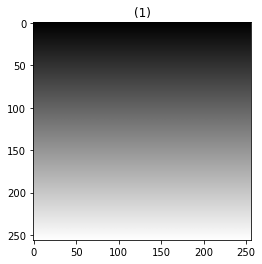

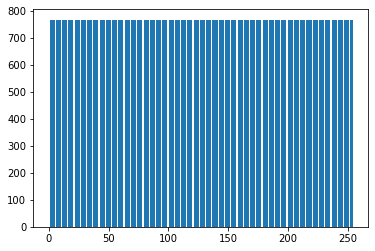

In [16]:
#using np.ones to draw an image
test = [np.ones((256,256))]
counter=0
for i in range (test[0].shape[0]):
    for j in range(test[0].shape[1]):
        test[0][i][j]=counter/255
    counter+=1
print(test[0])
show_images(test)
histogram3, bin_edges3 = np.histogram(test, bins=256, range=(0, 1))

bin_edges33 = bin_edges3[0:256]
hist3 = [histogram3,bin_edges33]
showHist(None ,hist3 )
